# Data Initialization

Imports

In [ ]:
# Standard Python
import collections
import random
import itertools
import io

#Data Science Python
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp
import scipy.spatial.distance as sp_dist
import altair as alt

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/_U of T Masters/AI for Chemical Engineering/CHE1148 Project/Large WTP Data.xlsx',
                 index_col='Date', parse_dates=['Date'])
parameters = df.columns.values.tolist()

print(df.head())
print(parameters)

            Year Month  Day  [Raw] Flow [m3/d]  \
Date                                             
2006-01-01  2006   Jan  Sun                NaN   
2006-01-02  2006   Jan  Mon                NaN   
2006-01-03  2006   Jan  Tue                NaN   
2006-01-04  2006   Jan  Wed                NaN   
2006-01-05  2006   Jan  Thu                NaN   

            [Raw] Alkalinity as CaCO3 [mg/L]  [Raw] Max Turbidity [NTU]  \
Date                                                                      
2006-01-01                             110.0                        NaN   
2006-01-02                             105.0                        NaN   
2006-01-03                             100.0                        NaN   
2006-01-04                             100.0                        NaN   
2006-01-05                             105.0                        NaN   

            [Raw] Min Turbidity [NTU]  [Raw] Mean Turbidity [NTU]  \
Date                                                  

# Data Cleaning

In [ ]:
cut_off_date = "2015-03-01"

df_clean = df.ffill().bfill()
df_clean = df_clean[df_clean.index >= cut_off_date]
print(df_clean.head)

<bound method NDFrame.head of             Year Month  Day  [Raw] Flow [m3/d]  \
Date                                             
2015-03-01  2015   Mar  Sun            42775.0   
2015-03-02  2015   Mar  Mon            43162.0   
2015-03-03  2015   Mar  Tue            44067.0   
2015-03-04  2015   Mar  Wed            37610.0   
2015-03-05  2015   Mar  Thu            42270.0   
...          ...   ...  ...                ...   
2025-12-27  2025   Dec  Sat            47902.0   
2025-12-28  2025   Dec  Sun            38709.0   
2025-12-29  2025   Dec  Mon            45898.0   
2025-12-30  2025   Dec  Tue            43118.0   
2025-12-31  2025   Dec  Wed            45531.0   

            [Raw] Alkalinity as CaCO3 [mg/L]  [Raw] Max Turbidity [NTU]  \
Date                                                                      
2015-03-01                              90.0                        2.1   
2015-03-02                             110.0                       11.2   
2015-03-03         

# Plotting Functions

In [ ]:
def draw_time_series(data, plot_title, y_label, plot_series_list, save_fig=False):
    # Standardized Time Series Plot. Input list of plot parameters,

    # Check if plot_series_list is all valid parameters
    for series in plot_series_list:
      if series not in parameters:
        raise ValueError(f"'{series}' is not a valid parameter. Please choose from: {parameters}")

    # Generate plot colours
    colours = mpl.colormaps['plasma']
    colour_map = [colours(i/len(plot_series_list)) for i in range(len(plot_series_list))]

    # Draw line plot
    fig, ax = plt.subplots(figsize=(16.5, 10))

    chart = data[plot_series_list].plot(
      kind = 'line',
      figsize = (15,9),
      title = plot_title,
      xlabel = 'Date',
      ax = ax,
      ylabel = y_label,
      ylim = (0, None),
      color = colour_map
    )

    # Save image and return fig
    if save_fig: fig.savefig(plot_title.replace(' ', '_') + '_time_series.png')
    return fig

def draw_multiaxis_series(data, plot_title, y_label1, y_label2, plot_series_list1, plot_series_list2, save_fig=False):
    # Time Series Plot with 2 y axes. Input list of plot parameters

    # Check if plot_series_list is all valid parameters
    for series in plot_series_list1:
      if series not in parameters:
        raise ValueError(f"'{series}' is not a valid parameter. Please choose from: {parameters}")

    for series in plot_series_list2:
      if series not in parameters:
        raise ValueError(f"'{series}' is not a valid parameter. Please choose from: {parameters}")

    # Generate plot colours from a single colormap for all series
    total_series = len(plot_series_list1) + len(plot_series_list2)
    colours = mpl.colormaps['plasma']
    colour_map = [colours(i/total_series) for i in range(total_series)]

    # Draw line plot
    fig, ax1 = plt.subplots(figsize=(16.5, 10))

    # Create plot on axis 1
    data[plot_series_list1].plot(
      kind = 'line',
      figsize = (15,9),
      title = plot_title,
      xlabel = 'Date',
      ax = ax1,
      ylabel = y_label1,
      ylim = (0, None),
      color = colour_map[:len(plot_series_list1)]
    )

    # Create plot on axis 2
    ax2 = ax1.twinx()
    data[plot_series_list2].plot(
      kind = 'line',
      figsize = (15,9),
      title = plot_title,
      xlabel = 'Date',
      ax = ax2,
      legend = False,
      ylabel = y_label2,
      ylim = (0, None),
      color = colour_map[len(plot_series_list1):]
    )

    # Combine legends from both axes
    ax1_lines, ax1_labels = ax1.get_legend_handles_labels()
    ax2_lines, ax2_labels = ax2.get_legend_handles_labels()
    ax1.legend(ax1_lines + ax2_lines, ax1_labels + ax2_labels, loc='upper left')

    # Save image and return fig
    if save_fig: fig.savefig(plot_title.replace(' ', '_') + '_time_series.png')
    return fig

def draw_xy_graph(data, plot_title, x_series, y_series, x_label=None, y_label=None, save_fig=False):
    # Standardized Time Series Plot. Input list of plot parameters,

    # Check if plot_series_list is all valid parameters
    if x_series not in parameters:
      raise ValueError(f"'{x_series}' is not a valid parameter. Please choose from: {parameters}")
    if y_series not in parameters:
      raise ValueError(f"'{y_series}' is not a valid parameter. Please choose from: {parameters}")

    # Using defaul labels
    if x_label is None: x_label = x_series
    if y_label is None: y_label = y_series

    # Draw scatter plot
    fig, ax = plt.subplots(figsize=(16.5, 10))

    data.plot(
      kind = 'scatter',
      figsize = (15,9),
      title = plot_title,
      x = x_series,
      y = y_series,
      xlabel = x_label,
      ylabel = y_label,
      color = 'blue',
      marker = 'o',
      alpha = 0.5,
      ax = ax,
      ylim = (0, None),
      xlim = (0, None)
    )

    # Calculate regression line parameters
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(data[x_series], data[y_series])
    r_squared = r_value**2
    equation = f'y = {slope:.2f}x + {intercept:.2f} (R² = {r_squared:.2f})'

    # Draw regression line
    sns.regplot(
      data = data,
      x = x_series,
      y = y_series,
      scatter = False,
      ax = ax,
      line_kws=dict(color="red")
    )

    # Add a dummy plot for the regression line label in the legend
    ax.plot([], [], color='red', label=equation)
    ax.legend()

    # Save image and return fig
    if save_fig: fig.savefig(plot_title.replace(' ', '_') + '_time_series.png')
    return fig


def draw_heat_map(data, save_fig=False):
    # Create heat map plot

    # Create correlation matrix
    df_heat = data.drop(['Year', 'Month', 'Day'], axis=1)
    corr = df_heat.corr().round(2)

    mask = np.triu(np.ones_like(corr, dtype=bool),1)
    fig, ax = plt.subplots(figsize=(32, 20))
    fig = sns.heatmap(corr,vmin=-1, vmax=1, center=0, annot=True, cbar=True, cbar_kws=None, mask=mask)

    if save_fig: fig.savefig('heatmap.png')
    return fig

def draw_box_plot(data, ylabel, plot_series, save_fig=False):
    # Draw box plots
    month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(16.5, 10))

    sns.boxplot(
        data = data,
        x = 'Year',
        y = plot_series,
        ax = ax1
    )

    sns.boxplot(
        data = data,
        x = 'Month',
        y = plot_series,
        order = month_order,
        ax = ax2
    )

    ax1.set_title('Year-wise Box Plot for ' + ylabel)
    ax1.set_xlabel('Year')
    ax1.set_ylabel(ylabel)

    ax2.set_title('Month-wise Box Plot for ' + ylabel)
    ax2.set_xlabel('Month')
    ax2.set_ylabel(ylabel)

    # Save image and return fig (don't change this part)
    if save_fig: fig.savefig(ylabel.replace(' ', '_') +'_box_plot.png')
    return fig

def draw_cumdist(data, ylabel, plot_series, title, save_fig=False):

    fig, ax = plt.subplots(figsize=(16.5, 10))

    sns.ecdfplot(
        data = data,
        y = plot_series,
        stat = "percent",
        ax = ax
    )

    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_ylim(0, None)
    ax.set_xlim(0, 100)

    # Save image and return fig (don't change this part)
    if save_fig: fig.savefig(ylabel.replace(' ', '_') +'_box_plot.png')
    return fig

# Plots

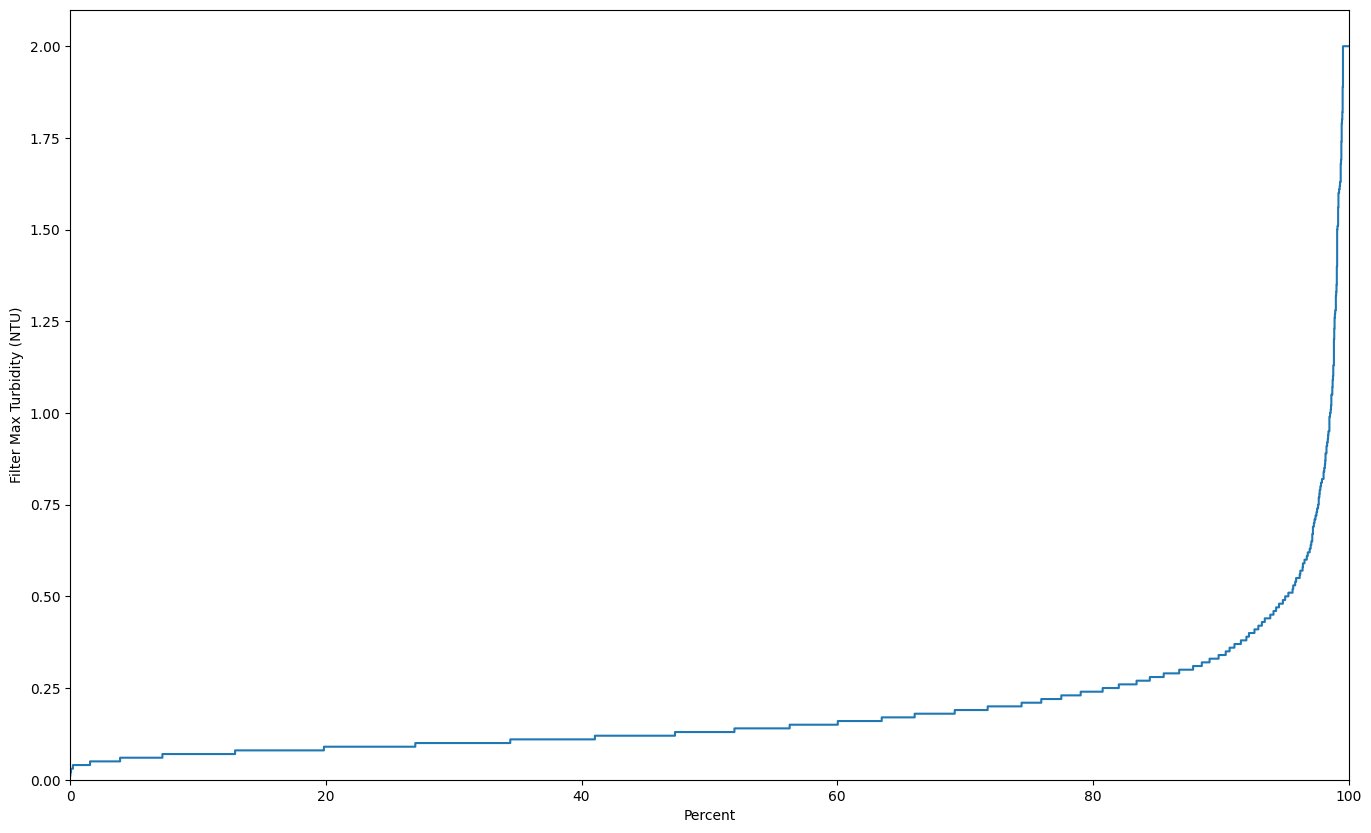

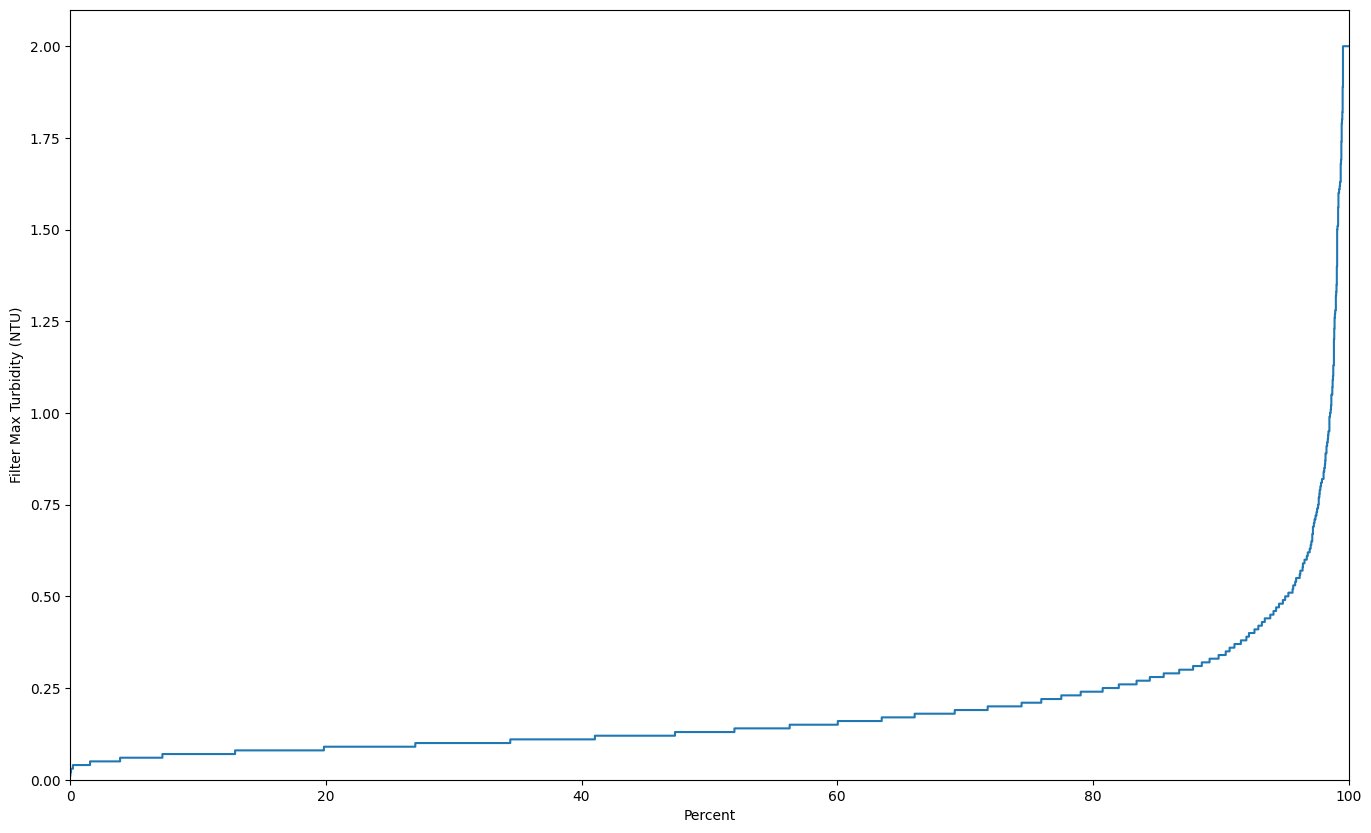

In [ ]:
#draw_multiaxis_series(df_clean, 'Historical Raw Flow and Filter Turbidity', "Flow (m3/d)", "Turbidity (NTU)", ["[Raw] Flow [m3/d]"], ['[Filt] Mean Turbidity [NTU]','[Filt] Max Turbidity [NTU]'])
#draw_xy_graph(df_clean, "Flow vs Filt Turbidity", "[Raw] Flow [m3/d]", '[Filt] Max Turbidity [NTU]')
#draw_time_series(df_clean, "Historical Filter Turbidity", "Turbidity (NTU)", ['[Filt] Mean Turbidity [NTU]','[Filt] Max Turbidity [NTU]'])
#draw_heat_map(df_clean)
#draw_box_plot(df_clean, "Filter Max Turbidity (NTU)", "[Filt] Max Turbidity [NTU]")
draw_cumdist(df_clean, "Filter Max Turbidity (NTU)", "[Filt] Max Turbidity [NTU]", '')

In [ ]:
print(parameters)

['Year', 'Month', 'Day', '[Raw] Flow [m3/d]', '[Raw] Alkalinity as CaCO3 [mg/L]', '[Raw] Max Tubidity [NTU]', '[Raw] Min Tubidity [NTU]', '[Raw] Mean Tubidity [NTU]', '[Raw] E.Coli [cfu/100mL]', '[Raw] TC [cfu/100mL]', '[Raw] Temperature [°C]', '[Raw] DOC [mg/L]', '[Raw] TOC [mg/L]', '[Raw] pH [-]', '[Raw] TAN [mg/L]', '[Raw] NO3-N [mg/L]', '[Raw] NO2-N [mg/L]', '[Raw] MIB [ng/L]', '[Raw] Geosmin [ng/L]', '[Chem] Powdered Activated Carbon Dose [mg/L]', '[Chem] Alum Dose [mg/L]', '[Chem] Polyaluminum Chloride Dose [mg/L]', '[Chem] Polymer Dosage [mg/L]', '[Filt] Max Turbidity [NTU]', '[Filt] Mean Turbidity [NTU]', '[Filt] Total Runtime [h]', '[Filt] Backwash Volume [m3]', '[TW] Flow [m3/d]', '[TW] Alkalinity as CaCO3 [mg/L]', '[TW] Cl Dosage [mg/L]', '[TW] pH [-]', '[TW] Al [mg/L]', '[TW] Turbidity [NTU]', '[TW] HAA [ug/L]', '[TW] THM [ug/L]', '[TW] TAN [mg/L]', '[TW] NO3-N [mg/L]', '[TW] NO2-N [mg/L]', '[TW] E. Coli [cfu/100mL]', '[TW] MIB [ug/L]', '[TW] Geosmin [ug/L]']
